In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images to a range of [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. Implement Model 1: MobileNetV2 (Pre-trained model)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


<ipython-input-2-973625af594a>:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Add custom layers on top of MobileNetV2
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

# Create the final model
model_1 = tf.keras.models.Model(inputs=base_model.input, outputs=x)

# Compile the model
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model 1
history_1 = model_1.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 84ms/step - accuracy: 0.2846 - loss: 1.9685 - val_accuracy: 0.3354 - val_loss: 1.8322
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.3447 - loss: 1.7939 - val_accuracy: 0.3466 - val_loss: 1.8016
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.3704 - loss: 1.7333 - val_accuracy: 0.3570 - val_loss: 1.7937
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.3864 - loss: 1.6927 - val_accuracy: 0.3564 - val_loss: 1.7826
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 81ms/step - accuracy: 0.4066 - loss: 1.6567 - val_accuracy: 0.3604 - val_loss: 1.7737


In [4]:
# 3. Implement Model 2: Simple CNN (Custom model)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile Model 2
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train Model 2
history_2 = model_2.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 84ms/step - accuracy: 0.3716 - loss: 1.7190 - val_accuracy: 0.5416 - val_loss: 1.3191
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 83ms/step - accuracy: 0.5857 - loss: 1.1822 - val_accuracy: 0.6431 - val_loss: 1.0365
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 82ms/step - accuracy: 0.6490 - loss: 1.0021 - val_accuracy: 0.6223 - val_loss: 1.0918
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.6823 - loss: 0.9093 - val_accuracy: 0.6581 - val_loss: 0.9920
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.7093 - loss: 0.8365 - val_accuracy: 0.6816 - val_loss: 0.9293


In [5]:
# 4. Make Predictions with both models
y_pred_1 = model_1.predict(x_test)
y_pred_2 = model_2.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [6]:
# Convert predictions to class labels
y_pred_classes_1 = np.argmax(y_pred_1, axis=1)
y_pred_classes_2 = np.argmax(y_pred_2, axis=1)

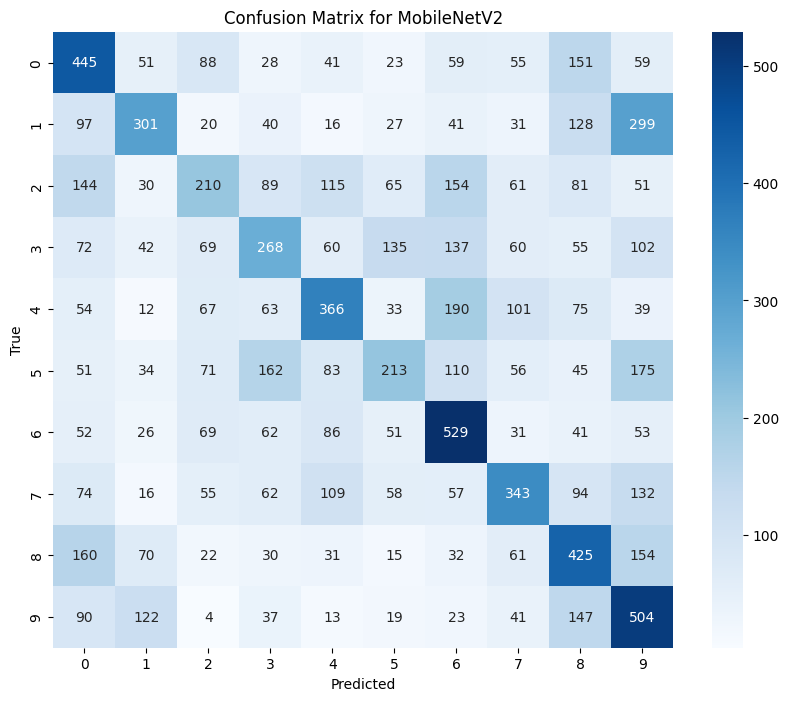

In [7]:
# 5. Plot Confusion Matrix for Model 1 (MobileNetV2)
cm_1 = confusion_matrix(y_test, y_pred_classes_1)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for MobileNetV2')
plt.show()

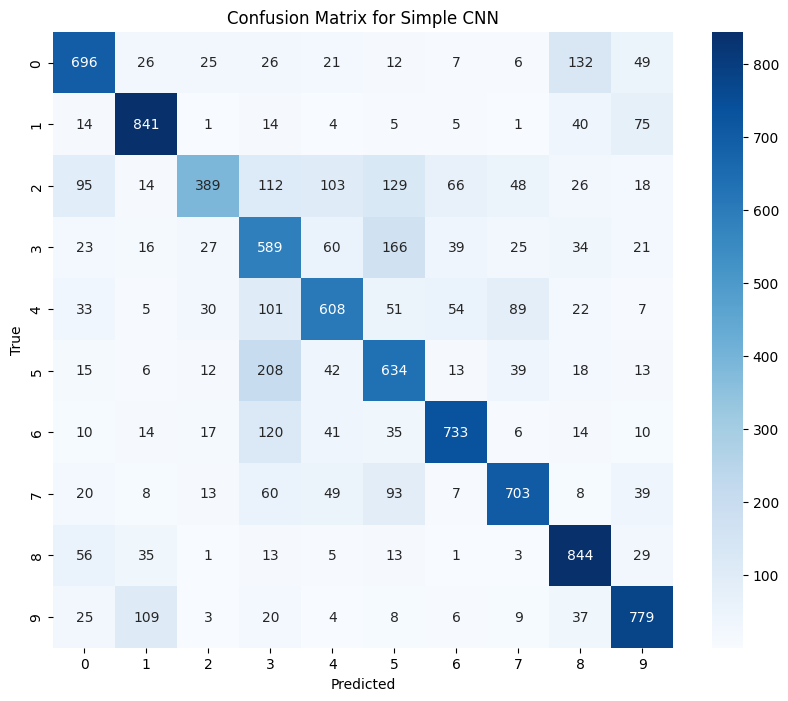

In [8]:
# 6. Plot Confusion Matrix for Model 2 (Simple CNN)
cm_2 = confusion_matrix(y_test, y_pred_classes_2)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Simple CNN')
plt.show()

In [9]:
# 7. Compare the Accuracies of both models
acc_1 = np.sum(y_pred_classes_1 == y_test.flatten()) / len(y_test)
acc_2 = np.sum(y_pred_classes_2 == y_test.flatten()) / len(y_test)

print(f"Accuracy of MobileNetV2 model: {acc_1:.4f}")
print(f"Accuracy of Simple CNN model: {acc_2:.4f}")

Accuracy of MobileNetV2 model: 0.3604
Accuracy of Simple CNN model: 0.6816



Example predictions from Model 1 (MobileNetV2):


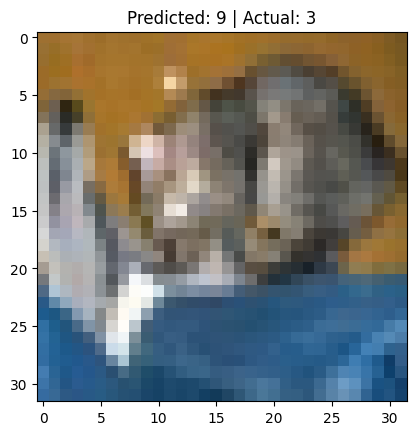

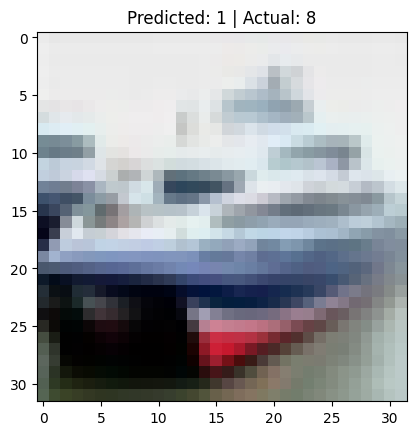

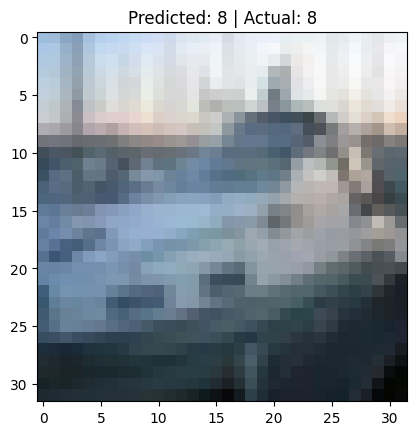

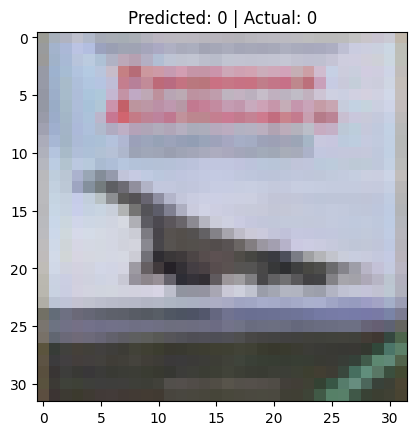

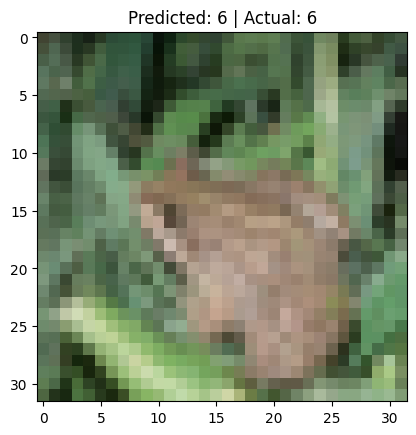

In [10]:
# 8. Show Example Predictions for Model 1 (MobileNetV2)
print("\nExample predictions from Model 1 (MobileNetV2):")
for i in range(5):
    plt.imshow(x_test[i])
    plt.title(f'Predicted: {y_pred_classes_1[i]} | Actual: {y_test[i][0]}')
    plt.show()


Example predictions from Model 2 (Simple CNN):


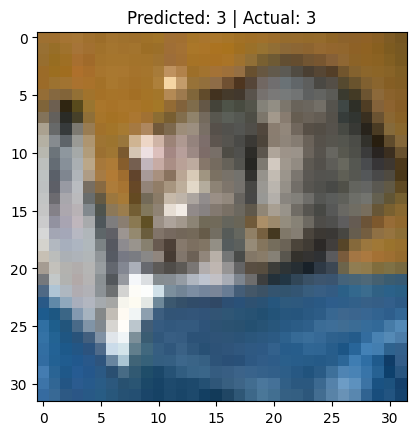

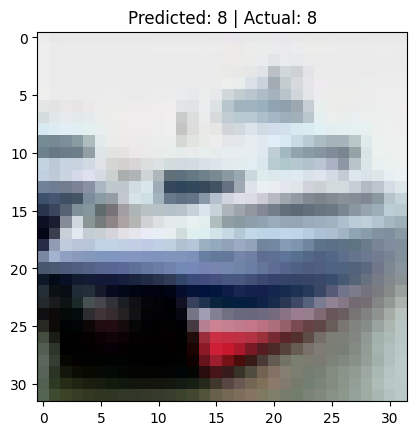

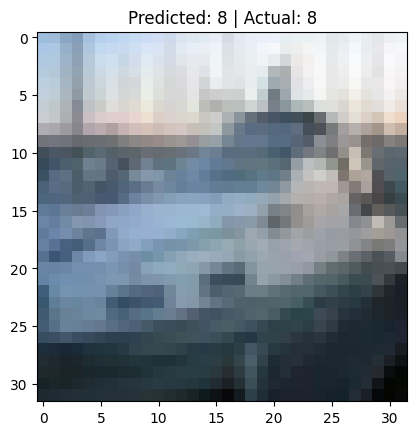

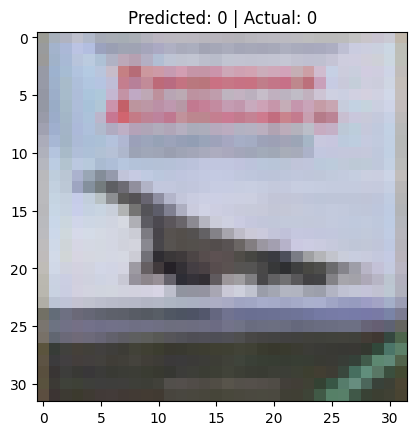

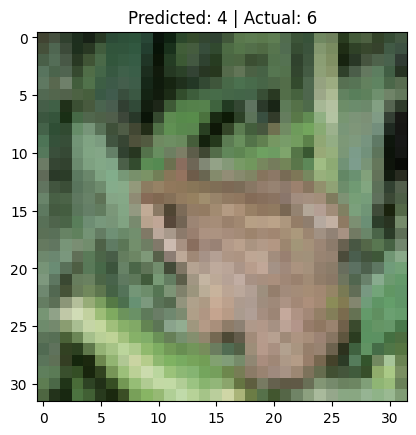

In [12]:
# 9. Show Example Predictions for Model 2 (Simple CNN)
print("\nExample predictions from Model 2 (Simple CNN):")
for i in range(5):
    plt.imshow(x_test[i])
    plt.title(f'Predicted: {y_pred_classes_2[i]} | Actual: {y_test[i][0]}')
    plt.show()